# EDSA 2022 Classification Sprint Hackathon
>### Att: Kennedy Ombedho


# Introduction

South Africa is a multiethnic country known for its extensive language diversity. The power of language to advance democracy and improve the social, cultural, intellectual, economic, and political spheres of South African society makes it an essential weapon.

There are 11 official languages in the nation, all of which are given equal recognition. The majority of South Africans speak two or more of the official languages and are multilingual. It simply makes sense that our systems and equipment communicate in multiple languages given the population's multilingual makeup.



# Problem Statement 

There are 11 official languages in the nation, all of which are given equal recognition. The majority of South Africans speak two or more of the official languages and are multilingual.

We are therefore tasked to  classify a text that is written in one of the 11 official languages of South Africa and determine the language it is written in. 


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Engineering Features</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. References</a>

   ### 1. IMPORTING PACKAGES

The loading of all the packages required for machine learning algorithms comes first. In addition to the fundamental packages like pandas, numpy, and matplotlib, we'll import a few scikit-learn packages for the use of machine learning algorithms and a comparison of those algorithms.

In [1]:
#libraries for loading and manipulating data.
import numpy as np
import pandas as pd
#libraries for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

#libraries for NLP and text preprocessing
import nltk
import re
import string 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample


#libraries for modelling
from nltk.util import ngrams
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#libraries for score metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, log_loss



# set plot style
sns.set()

import warnings
warnings.filterwarnings('ignore')

### 2. LOADING DATA

We are using  the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). 

In [2]:
#load training data
df_train = pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')

pd.set_option('max_colwidth', -1)#
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


### 3. EXPLORATORY DATA ANALYSIS(EDA)


After loading in our dataset we first start with the vital component EDA to better understand the dataset we are working with and, to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"

We take a look quick look at the first few rows of the training and testing dataset to have an overview of our features and labels, (using pd.head() method)

In [3]:
#Checking the data information 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [4]:
#checking for unique values 
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

There are a total of 11 different languages, with each of them appearing a total of 3000 times meaning Our target variable is balanced.

Text(0.5, 1.0, 'Distribution of target labels')

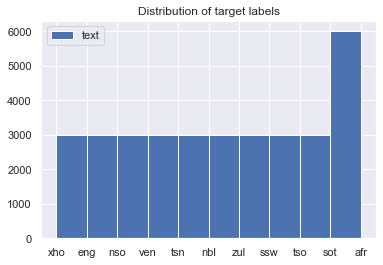

In [5]:
# Visualizing the distribution of the target 
plt.hist(df_train['lang_id'], label='text')
plt.legend()
plt.title('Distribution of target labels')

In [6]:
# Visualize the frequent words 
all_words = " ".join([sentence for sentence in df_train['text']])

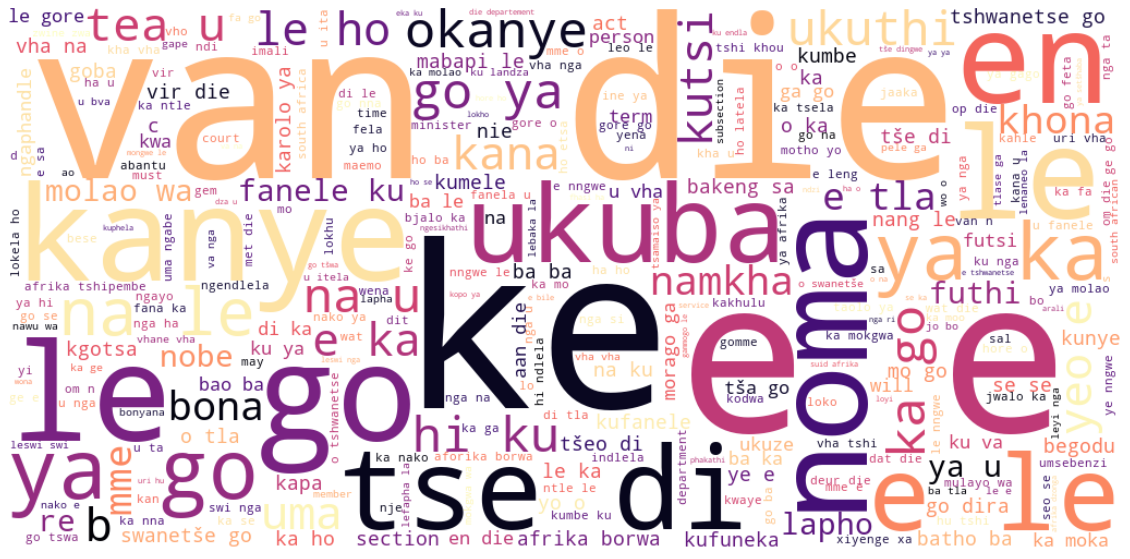

In [7]:
wordcloud = WordCloud(background_color="white", 
                      max_words=300,
                      width=1024, 
                      height=500,
                      colormap="magma"                      
                     ).generate(all_words)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("cloud.png", format="png")
plt.show()

### 4. DATA CLEANING & FEATURE ENGINEERING


In [8]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    text=re.sub('[^a-zA-Z#]', ' ',text)
    # will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [9]:
#remove special characters, and punctuation then coverting to lower by applying clean_text function
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,i dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,the province of kwazulu natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,o netefat a gore o ba file dilo ka moka t e le dumelelanego ka t ona mohlala maleri a magolo a a omi wago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go omela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [10]:
df_test.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo.",mmasepala fa maemo a a kgethegileng a letlelela kgato eo
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.,kube inja nelikati betingevakala kutsi titsini naticocisana
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


### 6. MODELING

#### **6.1 Vectorization**

In [11]:
# vectorization clean training data 
vect = TfidfVectorizer(min_df=2, 
                      max_df=0.9,
                       #max_features= 1000,
                       ngram_range=(3, 6),
                       analyzer=('char'))


In [ ]:
#fit and transorm data 
training_x = vect.fit_transform(df_train['clean_text']) 

In [ ]:
#vectorize test data set,here we are only trasforming and unlike for train data whic we fit_transform
X_test_features = vect.transform(df_test['clean_text'])


In [ ]:
X_test_features.shape

### **6.2 Spliting Train dataset**

**Storing the independent and dependent variables**

So, here the x stores the independent variable and y stores the dependent variable language id.

In [ ]:
#define features and variables
X = training_x 
y = df_train['lang_id']


**Splitting the data set**

Here the  train data set has been divided into train and test data set. The test data set size is 20% of the total records. This test data will not be used in model training.

In [ ]:
#using test_train_split to split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

In [ ]:
seed=30
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)

### 6.3 Loading all Models

In [ ]:

#Loading all models
models = []

models.append(('LR', LogisticRegression()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('MNB',MultinomialNB()))

### 6.4 Evaluating the models
Here we have created two empty array named results and names and an object scoring. Now we have made a for loop which will itterate over all the models, In the loop we have used the function Kfold and cross validation score with the desired parameters. Finally we have used a print statement to print the result for all the models

In [ ]:
#Evaluating the models
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold =model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
results

### 6.5 Boxplot algorithm comparison


In [ ]:
# Ploting BoxPlot
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We will proceed with the first three algorithms (to see which will come out better) by applying hyperparameter tunining, as they are the most performing models and considering their execution time.

#### **logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
lm=LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000)

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
#generate predictionsS
lm_tuned_pred = lm.predict(X_test)

In [ ]:
ac = accuracy_score(y_test, lm_tuned_pred)
print("Accuracy is :",ac)

In [ ]:
#predicting the test data
test_pred = lm.predict(X_test_features)

In [ ]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred})
output.to_csv('Logistic_reg_submission.csv', index=False)

#### Passive Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, y_train)
pred = pass_tf.predict(X_test)


acc = accuracy_score(y_test, pred)#metrics reporting
report = classification_report(y_test,pred)

print("Accuracy is :",acc)
print("Report is :",report)

In [ ]:
#predicting the test data
test_pred2 = pass_tf.predict(X_test_features)

In [ ]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred2})
output.to_csv('PAC.csv', index=False)

#### **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2= MultinomialNB()

model2.fit(X_train, y_train)  # Fitting the model

y_pred_mnb =model2.predict(X_test)  # predicting the fit on validation set

print(classification_report(y_test, y_pred_mnb))

In [ ]:
acc = accuracy_score(y_test, y_pred_mnb)#metrics reporting
print("Accuracy is :",acc)

In [ ]:
#predicting the test data
test_pred3 = model2.predict(X_test_features)

In [ ]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred3})
output.to_csv('MNB.csv', index=False)

### 7. MODEL PERFOMANCE

The cross validation score are printed and it is clearly suggesting Logistic Regression ,Passive Aggresive Classifier and Multinomial Naive Bayes to the most accurate machine learning alggorithms.

The most performing is the Multinomial Naive Bayes with F1-Macro of 99.9% and accuracy of 99.9% while closely followed by  Logistic Regression, Linear Support Vector Classifier, etc.


### 8. MODEL EXPLANATION

To ensure that we got a robust measure of classifier performance, we applied cross validation on our models.
From the graph above, we can see that logistic regression, the SVM variants, and the Random Forest model all perform similarly and post good metric scores. On the other hand, our KNN classifier performed by far the worst. This can be expected seeing that we arbitrarily chose the value of k for that model

### 9.References

1. https://pythondata.com

2. https://www.kaggle.com
